# Zomato Mumbai Data Analysis Project
### Data Preprocessing & Exploratory Data Analysis

## 1. Import relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

## 2. Data Collection

In [2]:
dataset_raw = pd.read_csv("Zomato_Mumbai_Dataset.csv", delimiter = '|')

In [3]:
dataset_raw

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


## 3. Basic Informations of Raw Dataset

In [4]:
dataset_raw.shape

(15081, 12)

In [5]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [6]:
dataset_raw.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
CITY                  1
REGION                1
URL                   1
PAGE NO               1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [7]:
dataset_raw.dtypes

NAME               object
PRICE              object
CUSINE_CATEGORY    object
CITY               object
REGION             object
URL                object
PAGE NO            object
CUSINE TYPE        object
TIMING             object
RATING_TYPE        object
RATING             object
VOTES              object
dtype: object

In [8]:
dataset_raw.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


## Steps To be Followed before creating the Model

### (i) Data Cleaning
##### Purpose: 
To correct or remove inaccurate, corrupted, or incomplete data. It's a subset of data wrangling and preprocessing.
##### Task
- Handling missing values (imputation or removal)
- Removing duplicates
- Correcting data entry errors (e.g., typos, incorrect formatting)
- Handling outliers or inconsistent data
- Standardizing data (ensuring uniformity in text formats, units, etc.)

### (ii) Data Wrangling
##### Purpose: 
To transform raw data into a structured and usable format. It encompasses data cleaning and goes beyond it.
##### Task
- Data Cleaning (as part of wrangling)
- Merging or joining datasets
- Reshaping data (e.g., pivoting, unpivoting)
- Feature extraction (e.g., creating new variables from existing ones)
- Handling missing or incorrect data (e.g., imputation)
- Converting data types
- Filtering and sorting

### (iii) Data Preprocessing
##### Purpose:
Preparing data for machine learning or statistical analysis. It typically happens after wrangling and focuses on making data ready for modeling.
##### Task
- Data Cleaning and Wrangling (as foundational steps)
- Normalization or standardization (scaling features)
- Encoding categorical variables (e.g., one-hot encoding, label encoding)
- Splitting datasets into training, validation, and test sets
- Handling imbalanced datasets (e.g., oversampling, undersampling)
- Feature selection or dimensionality reduction (e.g., PCA)

### (iv) Exploratory Data Analysis
##### Purpose:
To summarize the main characteristics of the dataset and uncover patterns, relationships, and insights. This is an analysis phase where you understand the data.
##### Task
- Descriptive statistics (mean, median, mode, standard deviation)
- Visualization (e.g., histograms, box plots, scatter plots, bar charts)
- Identifying correlations between variables (e.g., using heatmaps)
- Checking for outliers or anomalies
- Distribution of variables
- Assessing relationships and interactions between variables

### Short Summary
- Data Cleaning: Fixing incorrect or inc omplete data.
- Data Wrangling: Structuring and transforming raw data into a usable form (includes cleaning).
- Data Preprocessing: Preparing data for machine learning or statistical analysis (includes cleaning, scaling, encoding, etc.).
- Exploratory Data Analysis (EDA): Analyzing the data to discover patterns and insights through statistical summaries and visualizations.


## Data Preproceing

## 4. Data Cleaning

### 4.1 Removal of redundant(unwanted) rows 

In [9]:
wrong_data = dataset_raw['PAGE NO'] == 'PAGE NO'
dataset_raw[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [10]:
# Performing Negation of the wrong dataset and then storing the correct data back in the dataset_raw DataFrame
# This permamnently remove the wrong data from the original dataframe
# Automatically it resets the index

dataset_raw = (dataset_raw[~wrong_data])

In [11]:
dataset_raw.shape       # (15081 rows - 942 rows)

(14139, 12)

In [12]:
# Dropping columns which are not required for further analysis
dataset_raw.drop(['URL','PAGE NO','CITY'], axis = 1, inplace = True)
dataset_raw.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_4260\1606638257.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


### 4.2 Removal of NULL records

In [13]:
# Checking for the NULL values

dataset_raw.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [14]:
dataset_raw[dataset_raw['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset_raw = dataset_raw.drop(labels=15080, axis = 0)

In [16]:
# Replacing the other NAN records with NA

dataset_raw.fillna('NA', inplace=True)

In [17]:
dataset_raw.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

### 4.3 Converting the datatypes of Numaerical variables to Numeric datatypes

In [18]:
dataset_raw.dtypes    

# Shows object datatype for numerical variables
# So we need to convert it from (object -> int/float)

NAME               object
PRICE              object
CUSINE_CATEGORY    object
REGION             object
CUSINE TYPE        object
TIMING             object
RATING_TYPE        object
RATING             object
VOTES              object
dtype: object

In [19]:
# Checking for text values in the column before converting it to numeric datatype

dataset_raw['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
2.2           4
4.8           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [20]:
# Replacing the text values with '0'

dataset_raw['RATING'].replace(to_replace=['-','NEW','Opening'], value = '0', inplace = True)

C:\Users\priya\AppData\Local\Temp\ipykernel_4260\758529825.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
dataset_raw['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1029       1
7350       1
964        1
585        1
1249       1
Name: count, Length: 1123, dtype: int64

In [22]:
dataset_raw['VOTES'].replace(to_replace=['-','NEW','Opening'], value = '0', inplace =True)

C:\Users\priya\AppData\Local\Temp\ipykernel_4260\1830807789.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [23]:
dataset_raw.dtypes

NAME               object
PRICE              object
CUSINE_CATEGORY    object
REGION             object
CUSINE TYPE        object
TIMING             object
RATING_TYPE        object
RATING             object
VOTES              object
dtype: object

In [24]:
# Changing the datatype for Numerical columns

dataset_raw['PRICE'] = dataset_raw['PRICE'].astype('int64')
dataset_raw['RATING'] = dataset_raw['RATING'].astype('float64')
dataset_raw['VOTES'] = dataset_raw['VOTES'].astype('int64')

In [25]:
dataset_raw.dtypes

NAME                object
PRICE                int64
CUSINE_CATEGORY     object
REGION              object
CUSINE TYPE         object
TIMING              object
RATING_TYPE         object
RATING             float64
VOTES                int64
dtype: object

In [26]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


### 4.4 Working with 'TIMIMG' column

In [27]:
dataset_raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [28]:
dataset_raw['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                              1192
11am to 12midnight(Mon-Sun)                         632
12noon to 12midnight(Mon-Sun)                       467
11am to 1130pm(Mon-Sun)                             309
10am to 10pm(Mon-Sun)                               267
                                                   ... 
1130am to 4pm,630pm to 1230AM...                      1
12midnight to 5am,12noon to 12midnight(Mon-Sun)       1
12midnight to 1230AM,12noon to 4pm,7pm to ...         1
12noon to 330pm,630pm to 12midnight...                1
8am to 11pm,12midnight to 115am(Mon-Sun)              1
Name: count, Length: 2551, dtype: int64

In [29]:
# Splitting the column and storing it in temp_df dataframe 
# SYNTAX -> string.split(separator, maxsplit)
# Expand the split strings into separate columns.

temp_df = dataset_raw['TIMING'].str.split('(', n = 1, expand = True)

In [30]:
temp_df

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [31]:
# Assigning the columns back to the dataset_raw dataframe

dataset_raw['TIMING'] = temp_df[0]
dataset_raw['DAYS_OPEN'] = temp_df[1]
dataset_raw.head(5)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [32]:
# Removing the bracket character from Days column
# regex = Determines if the passed-in pattern is a regular expression

dataset_raw['DAYS_OPEN'] = dataset_raw['DAYS_OPEN'].str.replace(")",'')
dataset_raw.head(5)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


In [33]:
dataset_raw.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [34]:
dataset_raw['DAYS_OPEN'].value_counts()

DAYS_OPEN
Mon-Sun                             12533
Mon-Sat,Closed(Sun                    170
Mon,11am to 11pm(Tue-Sun               30
Mon,Wed,Thu,Fri,Sat,Sun...             26
Mon,Tue,Wed...                         25
                                    ...  
Mon-Sat,130pm to 1045pm(Sun             1
Mon-Sat,1pm to ...                      1
Mon,11am to 4pm,7pm to ...              1
Mon-Tue,1130am to 4pm,7pm to ...        1
Mon,1230pm...                           1
Name: count, Length: 720, dtype: int64

In [35]:
dataset_raw.fillna('NA',inplace=True)

In [36]:
dataset_raw.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
DAYS_OPEN          0
dtype: int64

In [37]:
dataset_raw.dtypes

NAME                object
PRICE                int64
CUSINE_CATEGORY     object
REGION              object
CUSINE TYPE         object
TIMING              object
RATING_TYPE         object
RATING             float64
VOTES                int64
DAYS_OPEN           object
dtype: object

### 4.5 Removing the Restaurnt records whose Rating or Votes is 0

In [38]:
# Finding those restaurant whose has 0 Rating or Votes

unwanted_data = (dataset_raw['RATING'] == 0.0) | (dataset_raw['VOTES'] == 0)
dataset_raw[unwanted_data]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [39]:
dataset_raw = dataset_raw[~unwanted_data]

In [40]:
dataset_raw.shape

(10767, 10)

In [41]:
dataset_raw['RATING'] == 0

0        False
1        False
2        False
3        False
4        False
         ...  
15075    False
15076    False
15077    False
15078    False
15079    False
Name: RATING, Length: 10767, dtype: bool

### 4.6 Working on 'RATING_TYPE' column

In [42]:
dataset_raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
Ortalama            2
Bueno               2
İyi                 2
Buono               2
Dobré               2
Bom                 2
Priemer             2
Průměr              2
Muito Bom           2
Promedio            2
Muy Bueno           1
Sangat Baik         1
Média               1
Biasa               1
Skvělé              1
Baik                1
Çok iyi             1
Excelente           1
Velmi dobré         1
Media               1
Name: count, dtype: int64

In [43]:
# Translating the texts into proper English text

dataset_raw['RATING_TYPE'].replace(to_replace='Excelente', value='Excellent', inplace = True)
dataset_raw['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
dataset_raw['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
dataset_raw['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
dataset_raw['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
dataset_raw['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_4260\418158687.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\priya\AppData\Local\Temp\ipykernel_4260\418158687.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [44]:
dataset_raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

### 4.7 Working with "REGION" column

In [45]:
dataset_raw['REGION'].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Hotel Emerald-- Juhu                   1
Trident-- Bandra Kurla Complex         1
Sea Princess-- Juhu                    1
Aureole Hotel-- Andheri East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [46]:
# Removing the irrelevant text from the Region column
# regex = Determines if the passed-in pattern is a regular expression

dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('[a-zA-Z].+-- ','', regex =True)


In [47]:
dataset_raw['REGION'].value_counts()

REGION
Thane West           712
Mira Road            412
Andheri West         407
Malad West           316
Bandra West          282
                    ... 
Andheri East           2
CBD Belapur            1
Girgaon Chowpatty      1
Goregaon               1
Dadar                  1
Name: count, Length: 120, dtype: int64

In [48]:
# Removing the West & East from the Region column

dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('West|west|East|east','', regex =True)

In [49]:
dataset_raw['REGION'].value_counts()

REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Kalyan                 2
Girgaon Chowpatty      1
CBD Belapur            1
Goregaon               1
Dadar                  1
Name: count, Length: 104, dtype: int64

In [50]:
# Replacing Small regions with Known region name

dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Runwal Green','Mulund',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Kamothe','Sion',regex=True)
dataset_raw['REGION'] = dataset_raw['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)


In [51]:
dataset_raw['REGION'].value_counts()

REGION
Thane          726
Mira Road      412
Andheri        409
Malad          378
Kandivali      377
              ... 
Mulund           7
Gorai            7
Peddar Road      4
Kalyan           2
Goregaon         1
Name: count, Length: 89, dtype: int64

### 4.8 Removing Duplicate records

In [52]:
# Finding all the duplicate rows

dataset_raw[dataset_raw.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [53]:
# Removing all duplicated rows

dataset_raw = dataset_raw.drop_duplicates()

In [54]:
# Cross check for the duplicates

dataset_raw[dataset_raw.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN


## 5. Copying Cleaned data to new dataframe

In [55]:
Zomato_Mumbai = dataset_raw.copy()

In [56]:
Zomato_Mumbai.head(5)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


### 6. Exploratory Data Analysis

#### Q1)  How many restaurants are in Mumbai for each type of cuisine?

In [57]:
#!pip install plotly
#!pip install -U kaleido

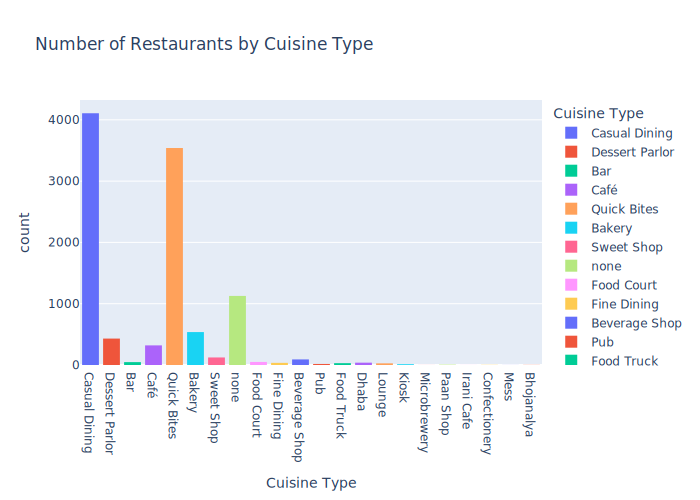

In [58]:
fig = px.histogram(Zomato_Mumbai, x = 'CUSINE TYPE', color = 'CUSINE TYPE',
                  title = 'Number of Restaurants by Cuisine Type',
                  labels = {'CUSINE TYPE':'Cuisine Type'})
fig.show()

#### Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [59]:
rating_type_df = Zomato_Mumbai['RATING_TYPE'].value_counts().reset_index() 
rating_type_df.rename(columns={'RATING_TYPE':'Rating_Types', 'count':'Count_of_Restaurants'},inplace=True)
rating_type_df

,Rating_Types,Count_of_Restaurants
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


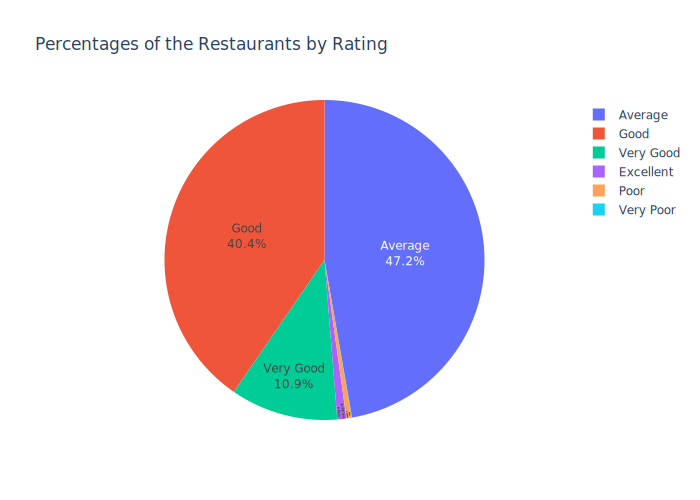

In [60]:
fig = px.pie(rating_type_df, names='Rating_Types', values ='Count_of_Restaurants', color ='Rating_Types',
            title = 'Percentages of the Restaurants by Rating').update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()

#### Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [61]:
seafood_df = Zomato_Mumbai[Zomato_Mumbai['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
903,Ferry Wharf,1500,"Seafood,Mangalorean",Bandra,Casual Dining,"11am to 330pm,7pm to 1230AM",Very Good,4.4,459,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun


#### Q4) Which is the best Food Truck in Mumbai?

In [62]:
foodTruck_df = Zomato_Mumbai[Zomato_Mumbai['CUSINE TYPE'] == 'Food Truck']
foodTruck_df.sort_values(by='RATING', ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


#### Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [63]:
highest_rated_df = Zomato_Mumbai[Zomato_Mumbai['RATING'] >= 4.5]
highest_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


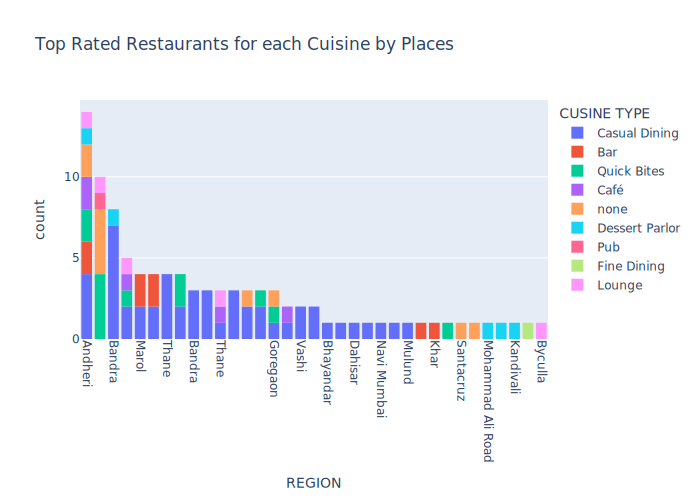

In [64]:
fig = px.histogram(highest_rated_df, x = 'REGION', color = 'CUSINE TYPE',
                   title = 'Top Rated Restaurants for each Cuisine by Places').update_xaxes(categoryorder = 'total descending',tickangle=90)
fig.show()

#### Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [65]:
ave_price_df = highest_rated_df.groupby(by=['REGION','CUSINE TYPE'])['PRICE'].mean().reset_index()
ave_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,,Casual Dining,1100.0
1,,none,350.0
2,Andheri,Bar,1600.0
3,Andheri,Café,800.0
4,Andheri,Casual Dining,1212.5


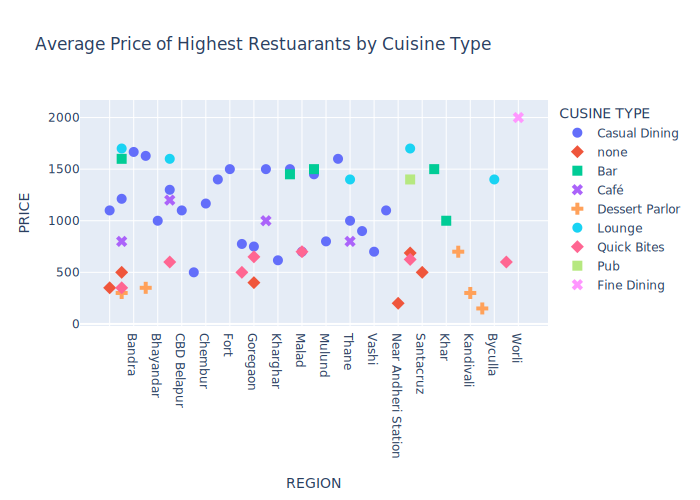

In [66]:
fig = px.scatter(ave_price_df, x = 'REGION', y = 'PRICE', color = 'CUSINE TYPE', symbol = 'CUSINE TYPE',
                 title = 'Average Price of Highest Restuarants by Cuisine Type').update_traces(marker_size = 10)
fig.show()

#### Q7) Which areas have a large number of Chinese Restaurant Market?

In [67]:
chinese_df = Zomato_Mumbai[Zomato_Mumbai['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am",Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [68]:
chinese_rest_df = chinese_df.groupby(by=['REGION']).agg({'NAME':'count', 'PRICE':'mean'}).rename(columns={'NAME':'COUNT OF RESTAURANTS','PRICE': "AVERAGE PRICE"})
chinese_rest_df = chinese_rest_df.sort_values(by=['COUNT OF RESTAURANTS'],ascending = False).head(25).reset_index()
chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,AVERAGE PRICE
0,Thane,348,588.376437
1,Mira Road,224,553.348214
2,Malad,186,604.032258
3,Goregaon,162,545.987654
4,Dombivali,159,540.899371


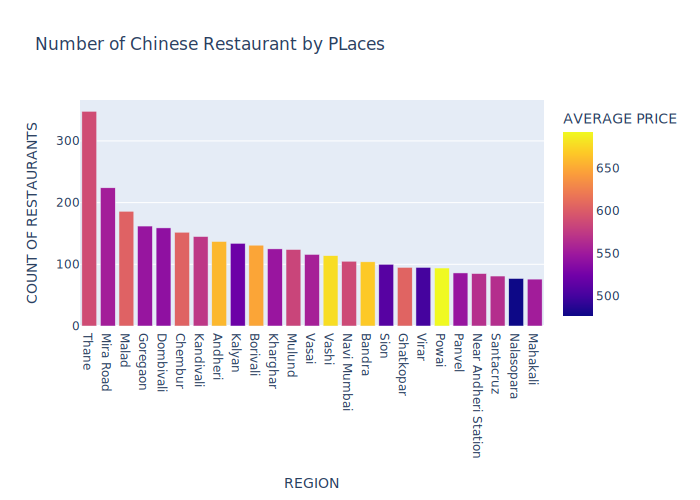

In [69]:
fig = px.bar(chinese_rest_df, x='REGION', y='COUNT OF RESTAURANTS', color='AVERAGE PRICE', 
            title= 'Number of Chinese Restaurant by PLaces')
fig.show()

#### Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [70]:
price_rating_df = Zomato_Mumbai.groupby(['CUSINE TYPE','RATING'])['PRICE'].mean().reset_index()
price_rating_df

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


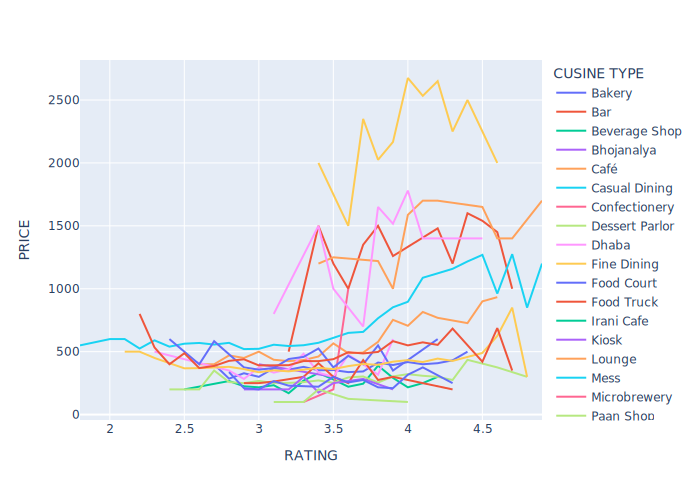

In [71]:
fig = px.line(price_rating_df, x = 'RATING', y = 'PRICE', color = 'CUSINE TYPE')
fig.show()

#### Q9) Is there a relation between Region and Price?

In [72]:
region_price_df = Zomato_Mumbai.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,,579.779412
1,,614.285714
2,Airoli,452.287582
3,Alibaug,665.000000
4,Ambernath,514.000000
...,...,...
84,Vikhroli,480.434783
85,Vile Parle,464.457831
86,Virar,452.027027
87,Wadala,427.500000


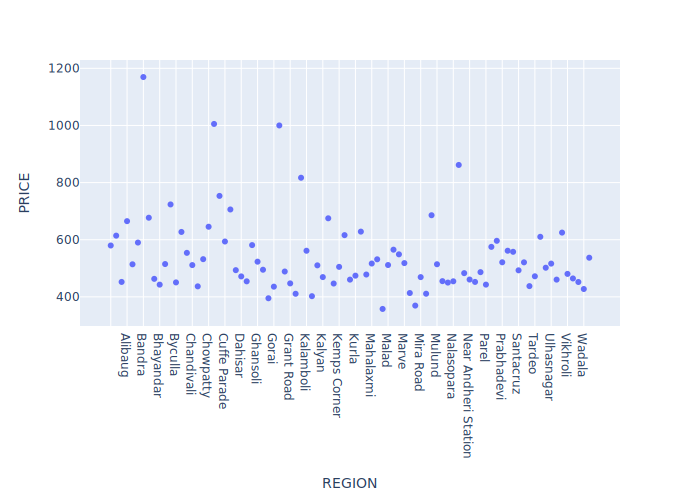

In [73]:
fig = px.scatter(region_price_df, x = 'REGION', y = 'PRICE')
fig.show()

#### Q10) Find the list of Affordable Restaurants?

In [74]:
Zomato_Mumbai.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


The criteria for Affordable Restaurants would be:-
1) Low Price
2) High Rated
- First step will find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
- Let me explain:- The most expensive restaurant has an average meal cost= 6000.
- We'll try to stay economical and only pick the restaurants that are 1/4th of 6000.

In [75]:
max_price = Zomato_Mumbai['PRICE'].max()
max_price

5000

In [76]:
oneFourth_price = max_price/4
oneFourth_price

1250.0

In [77]:
low_price_df =  Zomato_Mumbai[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'RATING','VOTES']]
low_price_df = low_price_df[low_price_df['PRICE'] < 1250]
low_price_df.sort_values(by=['PRICE'],inplace = True)
low_price_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING,VOTES
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane,Casual Dining,3.5,36
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none,3.3,8
9598,Ho5 Store,50,Fast Food,Matunga,none,3.2,8
9669,Himson Dryfruit & Sweets,100,"Fast Food,Mithai",Vile Parle,Quick Bites,2.9,5
3127,Tandoor Chai,100,"Fast Food,Beverages,Tea",Kalyan,Quick Bites,3.4,13
...,...,...,...,...,...,...,...
1837,Chi Na Chi Ni,1200,Asian,Kharghar,Casual Dining,4.3,514
14215,Reise All Day Bar & Kitchen,1200,"Burger,American,Italian,North Indian,European,...",Chakala,Casual Dining,3.9,969
14214,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri,Casual Dining,4.5,1782
7105,Bayview Cafe,1200,"North Indian,American,Chinese",Colaba,Casual Dining,3.9,1315


In [78]:
high_rated_df = Zomato_Mumbai[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'RATING','VOTES']]
high_rated_df = high_rated_df[high_rated_df['RATING'] > 4.5]
high_rated_df.sort_values(by='RATING',inplace=True)
high_rated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING,VOTES
1781,Yazu - Pan Asian Supper Club,1700,"Thai,Korean,Japanese,Chinese",Andheri,Casual Dining,4.6,258
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6,105
1533,Fruitilicious,700,Desserts,Kalbadevi,Dessert Parlor,4.6,107
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6,240
1796,TBG- The Biryani Guys,450,"North Indian,Biryani",Powai,none,4.6,148
1847,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining,4.6,223
1968,Curry Culture,800,"North Indian,Biryani,Chinese,Kebab,Mughlai,Asian",Powai,none,4.6,726
2321,Lion Heart,1400,"North Indian,Chinese,Italian,Finger Food,Asian...",Byculla,Lounge,4.6,852
2573,Sam's Bohri Zaika,600,"Bohri,North Indian,Mughlai,Kebab",Chandivali,Quick Bites,4.6,136
1251,Joey's Pizza,800,Pizza,Malad,Quick Bites,4.6,7350


In [79]:
afford_rest_df = pd.merge(low_price_df, high_rated_df, how = 'inner', on=['NAME','REGION'])
afford_rest_df = afford_rest_df[['NAME', 'PRICE_x', 'RATING_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x','VOTES_x']]
afford_rest_df.rename(columns={'NAME':"NAME",'PRICE_x':'PRICE','RATING_x':'RATING','CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
                              'REGION':'REGION','CUSINE TYPE_x':'CUSINE TYPE','VOTES_x':'VOTES'})

,NAME,PRICE,RATING,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
0,Cake Centre-The Dessert Maker,150,4.6,Desserts,Mohammad Ali Road,Dessert Parlor,105
1,Cone Culture,250,4.6,European,Kharghar,Casual Dining,492
2,Smiley Pops,300,4.6,"Desserts,Ice Cream,Beverages,Sandwich",Andheri,Dessert Parlor,94
3,The Northern Vibe,300,4.8,"Momos,Rolls,Fast Food",Powai,Quick Bites,145
4,Dessertino,300,4.8,"Desserts,Ice Cream",Kandivali,Dessert Parlor,184
5,Big Bang Cuurry,350,4.7,"North Indian,Biryani,Rolls",,none,227
6,Coppetto Artisan Gelato,350,4.6,"Ice Cream,Desserts",Bandra,Dessert Parlor,759
7,TBG- The Biryani Guys,450,4.6,"North Indian,Biryani",Powai,none,148
8,Hotel Sagar,500,4.7,"North Indian,Chinese,Beverages",Chakala,Casual Dining,40
9,B For Biryani,500,4.6,"Biryani,North Indian,Kebab",Powai,Quick Bites,45


#### Q11) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price
2) High Rated
3) Large No. of Votes
- First step will find the restaurants with Votes greater than the Mean of Votes

In [80]:
mean_vote = Zomato_Mumbai['VOTES'].mean()
mean_vote

177.2656679624538

In [81]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote

greater_votes_df = Zomato_Mumbai[['NAME', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'PRICE', 'RATING', 'VOTES' ]]
greater_votes_df = greater_votes_df[greater_votes_df['VOTES'] > mean_vote]
greater_votes_df.sort_values(by='VOTES',inplace=True)
greater_votes_df

,NAME,CUSINE_CATEGORY,REGION,CUSINE TYPE,PRICE,RATING,VOTES
4194,Sai Sagar Veg Treat,"North Indian,South Indian,Chinese,Fast Food,Be...",Kalyan,Casual Dining,500,3.5,178
884,Rajmanya- Seafood family restaurant,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,800,4.5,178
3914,Ice Cafe,"Fast Food,Ice Cream,Beverages,Pizza",Borivali,Quick Bites,500,4.3,178
7897,Konkan Lajjatdar,"Seafood,Biryani,Beverages,Chinese,Malwani,Konkan",Andheri,Casual Dining,500,3.6,178
3828,Frozen Delight -The Dessert Cafe,"Desserts,Ice Cream",Airoli,Dessert Parlor,250,3.9,178
...,...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,1600,3.9,7327
1251,Joey's Pizza,Pizza,Malad,Quick Bites,800,4.6,7350
5337,Chili's American Grill & Bar,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,1400,4.3,7377
3751,Prithvi Cafe,"Cafe,Fast Food",Juhu,Café,700,4.4,8000


### These are the most reliable, highest rated and affordable restaurants:-
- We obtain this dataframe by simply taking the intersection of afford_rest_df & greater_votes_df
- This dataframe obtained below shows the restaurants whose:
 - Cost is below  **1250**
 - Rating is above **4.5**
 - Votes are above **177**

In [82]:
reliable_rest_df = pd.merge(afford_rest_df,greater_votes_df, how = 'inner', on = ['NAME','REGION'])
reliable_rest_df = reliable_rest_df[['NAME','CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x', 'PRICE_x', 'RATING_x','VOTES_x']]
reliable_rest_df.rename(columns={'NAME':"NAME",'CUSINE_CATEGORY_x':'CUSINE_CATEGORY','REGION':'REGION',
                              'CUSINE TYPE_x':'CUSINE TYPE','PRICE_x':'PRICE','RATING_x':'RATING','VOTES_x':'VOTES'},inplace=True)
reliable_rest_df

,NAME,CUSINE_CATEGORY,REGION,CUSINE TYPE,PRICE,RATING,VOTES
0,Cone Culture,European,Kharghar,Casual Dining,250,4.6,492
1,Dessertino,"Desserts,Ice Cream",Kandivali,Dessert Parlor,300,4.8,184
2,Big Bang Cuurry,"North Indian,Biryani,Rolls",,none,350,4.7,227
3,Coppetto Artisan Gelato,"Ice Cream,Desserts",Bandra,Dessert Parlor,350,4.6,759
4,Little West Pizza,Pizza,Borivali,Quick Bites,600,4.6,348
5,Regano's,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining,600,4.6,223
6,Maharashtra Lunch Home,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,600,4.6,209
7,Dum & Curry,"Mughlai,North Indian,Chinese",Powai,Quick Bites,700,4.7,683
8,Daftar Goregaon,"Pizza,Chinese,North Indian,Beverages",Goregaon,Casual Dining,750,4.6,388
9,Family Tree,"Italian,Mexican,North Indian,Chinese,Salad",Thane,Casual Dining,800,4.6,1891
